<a href="https://colab.research.google.com/github/ananthomprakash/Android/blob/master/House_Rent_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # to perform numerical operations
import pandas as pd # for data manipulations and data agrregations
import matplotlib.pyplot as plt
import pandas.util.testing as tm
import seaborn as sns   # for visualization
from sklearn.linear_model import LinearRegression #  To Build regression algo
import statsmodels.api as sm # to build the statstical models
from sklearn.model_selection import train_test_split # to divide the data into train and test
import sklearn.metrics 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  after removing the cwd from sys.path.


In [3]:
from google.colab import drive
drive.mount('/content/DataSets')

Drive already mounted at /content/DataSets; to attempt to forcibly remount, call drive.mount("/content/DataSets", force_remount=True).


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':"1mflrMcbcKXdIQr45xYm4H6PcdB8dBKt7"})
downloaded.GetContentFile('housing_train.csv')

In [0]:
house_raw = pd.read_csv('housing_train.csv')

In [8]:
house_raw.shape

(265190, 22)

In [9]:
house_raw.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195,apartment,1908,3,2.0,1,1,1,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
1,7041970863,https://bham.craigslist.org/apa/d/birmingham-w...,birmingham,https://bham.craigslist.org,1120,apartment,1319,3,2.0,1,1,1,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,Find Your Way to Haven Apartment Homes Come ho...,33.3755,-86.8045,al
2,7041966914,https://bham.craigslist.org/apa/d/birmingham-g...,birmingham,https://bham.craigslist.org,825,apartment,1133,1,1.5,1,1,1,0,0,0,laundry on site,street parking,https://images.craigslist.org/00h0h_b7Bdj1NLBi...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
3,7041966936,https://bham.craigslist.org/apa/d/birmingham-f...,birmingham,https://bham.craigslist.org,800,apartment,927,1,1.0,1,1,1,0,0,0,laundry on site,street parking,https://images.craigslist.org/00808_6ghZ8tSRQs...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
4,7041966888,https://bham.craigslist.org/apa/d/birmingham-2...,birmingham,https://bham.craigslist.org,785,apartment,1047,2,1.0,1,1,1,0,0,0,laundry on site,street parking,https://images.craigslist.org/00y0y_21c0FOvUXm...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al


In [10]:
house_raw.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')

In [11]:
house_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265190 entries, 0 to 265189
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       265190 non-null  int64  
 1   url                      265190 non-null  object 
 2   region                   265190 non-null  object 
 3   region_url               265190 non-null  object 
 4   price                    265190 non-null  int64  
 5   type                     265190 non-null  object 
 6   sqfeet                   265190 non-null  int64  
 7   beds                     265190 non-null  int64  
 8   baths                    265190 non-null  float64
 9   cats_allowed             265190 non-null  int64  
 10  dogs_allowed             265190 non-null  int64  
 11  smoking_allowed          265190 non-null  int64  
 12  wheelchair_access        265190 non-null  int64  
 13  electric_vehicle_charge  265190 non-null  int64  
 14  come

In [12]:
house_raw.isnull().sum()/len(house_raw)*100

id                          0.000000
url                         0.000000
region                      0.000000
region_url                  0.000000
price                       0.000000
type                        0.000000
sqfeet                      0.000000
beds                        0.000000
baths                       0.000000
cats_allowed                0.000000
dogs_allowed                0.000000
smoking_allowed             0.000000
wheelchair_access           0.000000
electric_vehicle_charge     0.000000
comes_furnished             0.000000
laundry_options            20.480033
parking_options            35.874279
image_url                   0.000000
description                 0.000754
lat                         0.535088
long                        0.535088
state                       0.000377
dtype: float64

In [13]:
house_raw.duplicated().sum()

0

In [14]:
house_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
id,265190.0,7.040888e+09,8.778930e+06,7.003808e+09,7.035963e+09,7.043109e+09,7.048362e+09,7.051263e+09
price,265190.0,1.227285e+04,5.376352e+06,0.000000e+00,8.170000e+02,1.060000e+03,1.450000e+03,2.768307e+09
sqfeet,265190.0,1.093678e+03,2.306888e+04,0.000000e+00,7.520000e+02,9.500000e+02,1.156000e+03,8.388607e+06
beds,265190.0,1.912414e+00,3.691900e+00,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,1.100000e+03
baths,265190.0,1.483468e+00,6.302080e-01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,7.500000e+01
cats_allowed,265190.0,7.168219e-01,4.505430e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
dogs_allowed,265190.0,6.965496e-01,4.597489e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
smoking_allowed,265190.0,7.338965e-01,4.419199e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
wheelchair_access,265190.0,7.875863e-02,2.693622e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
electric_vehicle_charge,265190.0,1.435952e-02,1.189680e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [0]:
house=house_raw.drop(["url","region_url","image_url","id"],axis=1)

In [16]:
house.shape

(265190, 18)

In [0]:
house.drop(["lat","long","state"],axis=1,inplace=True)

In [18]:
house.shape

(265190, 15)

In [19]:
house.head()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,description
0,birmingham,1195,apartment,1908,3,2.0,1,1,1,0,0,0,laundry on site,street parking,Apartments In Birmingham AL Welcome to 100 Inv...
1,birmingham,1120,apartment,1319,3,2.0,1,1,1,0,0,0,laundry on site,off-street parking,Find Your Way to Haven Apartment Homes Come ho...
2,birmingham,825,apartment,1133,1,1.5,1,1,1,0,0,0,laundry on site,street parking,Apartments In Birmingham AL Welcome to 100 Inv...
3,birmingham,800,apartment,927,1,1.0,1,1,1,0,0,0,laundry on site,street parking,Apartments In Birmingham AL Welcome to 100 Inv...
4,birmingham,785,apartment,1047,2,1.0,1,1,1,0,0,0,laundry on site,street parking,Apartments In Birmingham AL Welcome to 100 Inv...


In [0]:
def outlier_cal(data):
    col=list(data.columns)
    for i in col:
        if (data[i].dtypes!='object'):
            if(data[i].nunique()> 2):
                iqr=data[i].quantile(0.75)-data[i].quantile(0.25)
                lo=data[i].quantile(0.25)-(1.5*iqr)
                uo=data[i].quantile(0.75)+(1.5*iqr)
                data[i]=np.where(data[i]>uo,uo,data[i])
                data[i]=np.where(data[i]<lo,lo,data[i])
    return data

In [21]:
house.dtypes

region                      object
price                        int64
type                        object
sqfeet                       int64
beds                         int64
baths                      float64
cats_allowed                 int64
dogs_allowed                 int64
smoking_allowed              int64
wheelchair_access            int64
electric_vehicle_charge      int64
comes_furnished              int64
laundry_options             object
parking_options             object
description                 object
dtype: object

In [22]:
house["baths"].value_counts()

1.0     136375
2.0      93726
1.5      18476
2.5       8185
3.0       4272
0.0       2045
4.0       1147
3.5        652
4.5        145
5.0        108
5.5         28
6.0         17
6.5          4
7.0          4
75.0         2
8.0          1
35.0         1
8.5          1
7.5          1
Name: baths, dtype: int64

In [0]:
house1=outlier_cal(data=house)

In [36]:
house1.describe().T

,count,mean,std,min,25%,50%,75%,max
price,265190.0,1183.357466,502.948051,0.0,817.0,1060.0,1450.0,2399.5
sqfeet,265190.0,980.013356,316.273115,146.0,752.0,950.0,1156.0,1762.0
beds,265190.0,1.873330,0.814419,0.0,1.0,2.0,2.0,3.5
baths,265190.0,1.478970,0.576873,0.0,1.0,1.0,2.0,3.5
cats_allowed,265190.0,0.716822,0.450543,0.0,0.0,1.0,1.0,1.0
dogs_allowed,265190.0,0.696550,0.459749,0.0,0.0,1.0,1.0,1.0
smoking_allowed,265190.0,0.733896,0.441920,0.0,0.0,1.0,1.0,1.0
wheelchair_access,265190.0,0.078759,0.269362,0.0,0.0,0.0,0.0,1.0
electric_vehicle_charge,265190.0,0.014360,0.118968,0.0,0.0,0.0,0.0,1.0
comes_furnished,265190.0,0.048644,0.215124,0.0,0.0,0.0,0.0,1.0


In [37]:
house1.dtypes

region                      object
price                      float64
type                        object
sqfeet                     float64
beds                       float64
baths                      float64
cats_allowed                 int64
dogs_allowed                 int64
smoking_allowed              int64
wheelchair_access            int64
electric_vehicle_charge      int64
comes_furnished              int64
laundry_options             object
parking_options             object
dtype: object

In [38]:
house1.columns

Index(['region', 'price', 'type', 'sqfeet', 'beds', 'baths', 'cats_allowed',
       'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'laundry_options',
       'parking_options'],
      dtype='object')

In [39]:
house1.nunique()

region                      298
price                      2177
type                         12
sqfeet                     1525
beds                          5
baths                         7
cats_allowed                  2
dogs_allowed                  2
smoking_allowed               2
wheelchair_access             2
electric_vehicle_charge       2
comes_furnished               2
laundry_options               5
parking_options               7
dtype: int64

In [0]:
house1=house1.drop(["description"],axis=1)

In [43]:
house1["region"].value_counts()

jacksonville              4246
rochester                 3677
fayetteville              3652
omaha / council bluffs    2727
denver                    2671
                          ... 
mansfield                    3
corvallis/albany             3
northwest OK                 2
east oregon                  1
texoma                       1
Name: region, Length: 298, dtype: int64

In [49]:
house1.nunique()

region                      298
price                      2177
type                         12
sqfeet                     1525
beds                          5
baths                         7
cats_allowed                  2
dogs_allowed                  2
smoking_allowed               2
wheelchair_access             2
electric_vehicle_charge       2
comes_furnished               2
laundry_options               5
parking_options               7
dtype: int64

In [42]:
house1["type"].value_counts()

apartment          218032
house               23741
townhouse           10381
condo                4864
duplex               3452
manufactured         3008
cottage/cabin         702
loft                  511
flat                  349
in-law                145
land                    4
assisted living         1
Name: type, dtype: int64

In [45]:
house1["laundry_options"].value_counts()

w/d in unit           91074
w/d hookups           50252
laundry on site       39186
laundry in bldg       27816
no laundry on site     2551
Name: laundry_options, dtype: int64

In [46]:
house1["parking_options"].value_counts()

off-street parking    88316
carport               28685
attached garage       27591
detached garage       12798
street parking        10570
no parking             1973
valet parking           122
Name: parking_options, dtype: int64

In [0]:
house2=house1[house1["region"]=='jacksonville']

In [0]:
house2=house2.drop(['region'],axis=1)

In [52]:
house2.nunique()

price                      568
type                         7
sqfeet                     399
beds                         5
baths                        7
cats_allowed                 2
dogs_allowed                 2
smoking_allowed              2
wheelchair_access            2
electric_vehicle_charge      2
comes_furnished              2
laundry_options              5
parking_options              6
dtype: int64

In [53]:
house2.dtypes

price                      float64
type                        object
sqfeet                     float64
beds                       float64
baths                      float64
cats_allowed                 int64
dogs_allowed                 int64
smoking_allowed              int64
wheelchair_access            int64
electric_vehicle_charge      int64
comes_furnished              int64
laundry_options             object
parking_options             object
dtype: object

In [0]:
house3=pd.get_dummies(house2,drop_first=True)

In [55]:
list(house3.columns)

['price',
 'sqfeet',
 'beds',
 'baths',
 'cats_allowed',
 'dogs_allowed',
 'smoking_allowed',
 'wheelchair_access',
 'electric_vehicle_charge',
 'comes_furnished',
 'type_condo',
 'type_duplex',
 'type_house',
 'type_loft',
 'type_manufactured',
 'type_townhouse',
 'laundry_options_laundry on site',
 'laundry_options_no laundry on site',
 'laundry_options_w/d hookups',
 'laundry_options_w/d in unit',
 'parking_options_carport',
 'parking_options_detached garage',
 'parking_options_no parking',
 'parking_options_off-street parking',
 'parking_options_street parking']

In [0]:
from sklearn.linear_model import LinearRegression  # this will help us to impute the numerical varaible missing values
from sklearn.linear_model import LogisticRegression # this will help us to impute the categorical varaible missing values
def fillnan(df):
    columns = df.columns[df.isnull().any()]
    for name in columns:
        y = df.loc[df[name].notnull(), name].values # the varaibles, which are having missing but consider only non missing rows of missing variables
        X = df.loc[df[name].notnull()].drop(columns, axis=1).values # non missing variables values are considering
        X_test = df.loc[df[name].isnull()].drop(columns, axis=1).values # missing rows 
        if df[name].dtypes == 'object':
            model = LogisticRegression()
            model.fit(X, y)
            df.loc[df[name].isnull(), name] = model.predict(X_test)
        else:
            model = LinearRegression()
            model.fit(X, y)
            df.loc[df[name].isnull(), name] = model.predict(X_test)
    return df

In [0]:
house4=fillnan(df=house3)

In [59]:
house4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4246 entries, 58604 to 222840
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   price                               4246 non-null   float64
 1   sqfeet                              4246 non-null   float64
 2   beds                                4246 non-null   float64
 3   baths                               4246 non-null   float64
 4   cats_allowed                        4246 non-null   int64  
 5   dogs_allowed                        4246 non-null   int64  
 6   smoking_allowed                     4246 non-null   int64  
 7   wheelchair_access                   4246 non-null   int64  
 8   electric_vehicle_charge             4246 non-null   int64  
 9   comes_furnished                     4246 non-null   int64  
 10  type_condo                          4246 non-null   uint8  
 11  type_duplex                         4

In [61]:
house4.head(10)

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,type_condo,type_duplex,type_house,type_loft,type_manufactured,type_townhouse,laundry_options_laundry on site,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit,parking_options_carport,parking_options_detached garage,parking_options_no parking,parking_options_off-street parking,parking_options_street parking
58604,1440.0,1480.0,3.0,2.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
58619,929.0,760.0,1.0,1.0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
58643,1079.0,915.0,2.0,2.0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
58680,916.0,600.0,1.0,1.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
61822,754.0,605.0,1.0,1.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
61830,1124.0,1230.0,2.0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
61856,1349.0,1188.0,2.0,2.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
61863,730.0,800.0,3.0,1.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
69822,1220.0,1140.0,2.0,2.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
69886,610.0,765.0,2.0,1.0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#Resetting the Index for house4 dataset
house4 = house4.reset_index(drop=True)

In [63]:
house4.head()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,type_condo,type_duplex,type_house,type_loft,type_manufactured,type_townhouse,laundry_options_laundry on site,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit,parking_options_carport,parking_options_detached garage,parking_options_no parking,parking_options_off-street parking,parking_options_street parking
0,1440.0,1480.0,3.0,2.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,929.0,760.0,1.0,1.0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,1079.0,915.0,2.0,2.0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,916.0,600.0,1.0,1.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,754.0,605.0,1.0,1.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


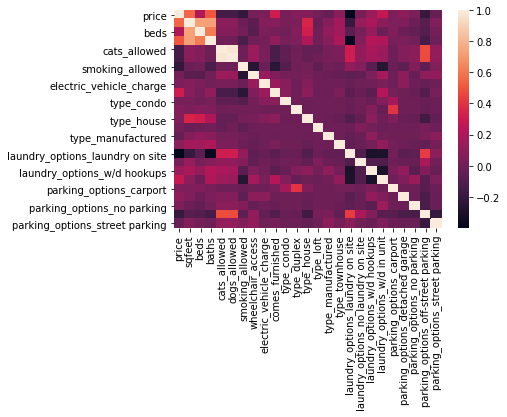

In [64]:
sns.heatmap(house4.corr())

In [65]:
house4.corr()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,type_condo,type_duplex,type_house,type_loft,type_manufactured,type_townhouse,laundry_options_laundry on site,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit,parking_options_carport,parking_options_detached garage,parking_options_no parking,parking_options_off-street parking,parking_options_street parking
price,1.000000,0.547509,0.211384,0.507705,-0.144606,-0.145528,-0.211742,0.017451,0.036991,0.310146,0.024714,0.068245,0.064518,0.013451,-0.032096,0.083303,-0.399643,0.031859,0.134896,0.278514,0.053339,0.089835,0.033753,-0.195755,-0.027371
sqfeet,0.547509,1.000000,0.733736,0.729218,0.082644,0.085747,-0.012610,-0.064941,0.069126,0.071939,0.027157,0.042151,0.346464,-0.022096,0.066637,0.166284,-0.201867,0.127128,0.195714,0.089054,0.043351,0.048792,-0.012408,-0.072673,0.063301
beds,0.211384,0.733736,1.000000,0.612644,0.063424,0.066662,0.006605,-0.079069,0.040694,0.019786,0.004620,0.065512,0.321121,-0.010423,0.114152,0.158534,-0.067992,0.025478,0.122691,-0.014371,0.055699,-0.016619,-0.039121,-0.094370,0.019159
baths,0.507705,0.729218,0.612644,1.000000,-0.006894,-0.010087,-0.124134,0.007157,0.011291,0.105210,0.023018,0.043408,0.202693,0.003048,0.080256,0.207282,-0.367299,0.063276,0.220089,0.208792,0.030905,0.035839,0.015111,-0.136636,-0.004793
cats_allowed,-0.144606,0.082644,0.063424,-0.006894,1.000000,0.976532,-0.007865,0.145874,0.027540,-0.126407,-0.054839,-0.008970,-0.037379,-0.034248,0.023048,0.035755,0.310995,0.110856,0.179906,0.145239,-0.006271,0.067721,0.083836,0.478745,0.115732
dogs_allowed,-0.145528,0.085747,0.066662,-0.010087,0.976532,1.000000,-0.004411,0.140566,0.027810,-0.127962,-0.054038,0.000622,-0.035338,-0.010010,0.023646,0.032784,0.311994,0.112134,0.173087,0.140740,-0.005527,0.068559,0.084658,0.471644,0.114398
smoking_allowed,-0.211742,-0.012610,0.006605,-0.124134,-0.007865,-0.004411,1.000000,-0.252432,-0.011551,-0.245366,-0.082620,0.001780,0.011633,-0.050875,0.008403,-0.013833,0.110134,0.066652,-0.071180,-0.256897,-0.021662,-0.055915,0.056436,-0.053498,0.060176
wheelchair_access,0.017451,-0.064941,-0.079069,0.007157,0.145874,0.140566,-0.252432,1.000000,0.132616,0.051859,0.016112,0.004181,0.029273,-0.005231,-0.018914,-0.031870,-0.053368,-0.047371,0.048447,0.178392,-0.006855,0.093966,-0.031870,0.106737,0.109641
electric_vehicle_charge,0.036991,0.069126,0.040694,0.011291,0.027540,0.027810,-0.011551,0.132616,1.000000,0.137243,0.080754,-0.002499,0.070308,-0.000943,-0.003410,-0.005746,-0.023452,-0.008542,0.001385,0.041353,-0.003540,0.081657,-0.005746,-0.030375,-0.008846
comes_furnished,0.310146,0.071939,0.019786,0.105210,-0.126407,-0.127962,-0.245366,0.051859,0.137243,1.000000,0.086003,-0.008887,0.096565,-0.003354,-0.012128,0.039596,-0.060998,-0.022130,-0.067618,0.218364,0.025976,-0.007040,-0.020436,-0.093565,0.024426


In [0]:
house4_corr=house4.corr()

In [0]:
house4_ind=house4.drop(['price'],axis=1)
house4_dep=house4["price"]

In [79]:
house4_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4246 entries, 0 to 4245
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   sqfeet                              4246 non-null   float64
 1   beds                                4246 non-null   float64
 2   baths                               4246 non-null   float64
 3   cats_allowed                        4246 non-null   int64  
 4   dogs_allowed                        4246 non-null   int64  
 5   smoking_allowed                     4246 non-null   int64  
 6   wheelchair_access                   4246 non-null   int64  
 7   electric_vehicle_charge             4246 non-null   int64  
 8   comes_furnished                     4246 non-null   int64  
 9   type_condo                          4246 non-null   uint8  
 10  type_duplex                         4246 non-null   uint8  
 11  type_house                          4246 no

In [80]:
house4_ind.head()

,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,type_condo,type_duplex,type_house,type_loft,type_manufactured,type_townhouse,laundry_options_laundry on site,laundry_options_no laundry on site,laundry_options_w/d hookups,laundry_options_w/d in unit,parking_options_carport,parking_options_detached garage,parking_options_no parking,parking_options_off-street parking,parking_options_street parking
0,1480.0,3.0,2.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,760.0,1.0,1.0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,915.0,2.0,2.0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,600.0,1.0,1.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,605.0,1.0,1.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [0]:
import statsmodels.formula.api as sm

def vif_cal(input_data, dependent_col):
    x_vars=input_data.copy()
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [82]:
vif_cal(input_data=house4_ind,dependent_col=house4_dep)

sqfeet  VIF =  3.39
beds  VIF =  2.53
baths  VIF =  2.75
cats_allowed  VIF =  22.63
dogs_allowed  VIF =  22.02
smoking_allowed  VIF =  1.25
wheelchair_access  VIF =  1.21
electric_vehicle_charge  VIF =  1.07
comes_furnished  VIF =  1.19
type_condo  VIF =  1.06
type_duplex  VIF =  1.22
type_house  VIF =  1.26
type_loft  VIF =  1.02
type_manufactured  VIF =  1.05
type_townhouse  VIF =  1.07
laundry_options_laundry on site  VIF =  2.97
laundry_options_no laundry on site  VIF =  1.47
laundry_options_w/d hookups  VIF =  2.39
laundry_options_w/d in unit  VIF =  2.44
parking_options_carport  VIF =  1.27
parking_options_detached garage  VIF =  1.1
parking_options_no parking  VIF =  1.09
parking_options_off-street parking  VIF =  2.18
parking_options_street parking  VIF =  1.28


In [0]:
house4_ind.drop(['cats_allowed'],axis=1,inplace=True)

In [84]:
vif_cal(input_data=house4_ind,dependent_col=house4_dep)

sqfeet  VIF =  3.39
beds  VIF =  2.53
baths  VIF =  2.74
dogs_allowed  VIF =  2.04
smoking_allowed  VIF =  1.25
wheelchair_access  VIF =  1.21
electric_vehicle_charge  VIF =  1.07
comes_furnished  VIF =  1.19
type_condo  VIF =  1.06
type_duplex  VIF =  1.21
type_house  VIF =  1.26
type_loft  VIF =  1.01
type_manufactured  VIF =  1.05
type_townhouse  VIF =  1.07
laundry_options_laundry on site  VIF =  2.95
laundry_options_no laundry on site  VIF =  1.46
laundry_options_w/d hookups  VIF =  2.36
laundry_options_w/d in unit  VIF =  2.41
parking_options_carport  VIF =  1.27
parking_options_detached garage  VIF =  1.1
parking_options_no parking  VIF =  1.09
parking_options_off-street parking  VIF =  2.16
parking_options_street parking  VIF =  1.28


In [0]:
from statsmodels.graphics.gofplots import qqplot

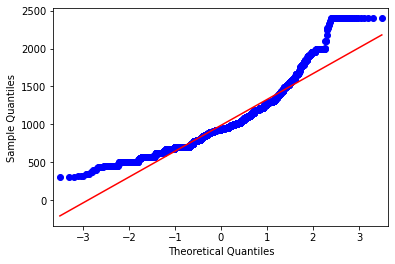

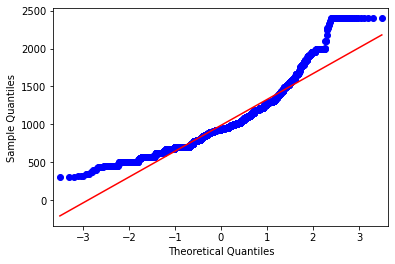

In [86]:
qqplot(house4["price"],line="s")